# Simulación del Comportamiento de un Reactor Químico con Control PID

## Descripción del Proceso

En esta simulación, modelamos un **reactor continuo de tanque agitado (CSTR)** con un sistema de control PID (Proporcional-Integral-Derivativo). El control PID se utiliza para regular dos variables clave: la **concentración del producto B** y la **temperatura del reactor**. Este tipo de control es ampliamente utilizado en la industria química para mantener los procesos dentro de condiciones seguras y óptimas, mejorando la estabilidad y la eficiencia del reactor.

### Objetivos del Control

El propósito de implementar controladores PID es:

- **Regular la Concentración del Producto B**: Mantener la concentración del producto B cerca de un valor deseado (setpoint) para asegurar la calidad y eficiencia del proceso.
- **Controlar la Temperatura del Reactor**: Mantener la temperatura del reactor dentro de un rango seguro para evitar condiciones peligrosas, como reacciones incontroladas o sobrecalentamiento.

### Variables del Proceso

1. **Variables a Controlar (Salida):**
   - **CB (Concentración del Producto B)**: Es fundamental mantener esta variable en el setpoint deseado para maximizar la conversión y calidad del producto.
   - **T (Temperatura del Reactor)**: Es crucial controlar la temperatura del reactor para mantener las condiciones de reacción estables y seguras.

2. **Variables Manipuladas (Entrada):**
   - **F0 (Flujo de Alimentación al Reactor)**: Manipulado por el PID para ajustar la concentración del producto B.
   - **Fj (Flujo de Alimentación a la Chaqueta)**: Manipulado por el PID para ajustar la temperatura del reactor.

3. **Variables de Perturbación:**
   - **T0 (Temperatura de Alimentación del Reactor)**: Cambios en esta temperatura pueden causar fluctuaciones en la temperatura interna del reactor.
   - **CA0 (Concentración de Reactivo en la Alimentación)**: Variaciones en la concentración de entrada afectan la velocidad de reacción y la producción de calor.
   - **U (Coeficiente de Transferencia de Calor)**: Cambios debidos a ensuciamiento o desgaste pueden alterar la eficiencia del control térmico.

### Ecuaciones del Modelo

El comportamiento del reactor y la chaqueta se describen mediante las siguientes ecuaciones diferenciales:

1. **Velocidad de Reacción (Arrhenius):**

   $$k = \alpha \cdot e^{-\frac{E}{R \cdot T}}$$

2. **Ecuación de la Concentración del Reactivo A:**

   $$\frac{dC_A}{dt} = \frac{F_0 \cdot (C_{A_0} - C_A)}{V} - k \cdot C_A$$

3. **Ecuación de la Concentración del Producto B:**

   $$frac{dC_B}{dt} = \frac{V \cdot k \cdot C_A - F_0 \cdot C_B}{V}$$

4. **Ecuación de la Temperatura del Reactor:**

   $$\frac{dT}{dt} = \frac{\rho \cdot C_p \cdot F_0 \cdot (T_0 - T) - \lambda \cdot k \cdot V \cdot C_A - U \cdot A \cdot (T - T_j)}{\rho \cdot C_p \cdot V}$$

5. **Ecuación de la Temperatura de la Chaqueta:**

   $$\frac{dT_j}{dt} = \frac{\rho_j \cdot C_{p_j} \cdot F_j \cdot (T_{j_0} - T_j) + U \cdot A \cdot (T - T_j)}{\rho_j \cdot C_{p_j} \cdot V_j}$$

### Implementación del Control PID

Los controladores PID ajustan los flujos de alimentación (\( F_0 \) y \( F_j \)) para minimizar el error entre las variables controladas y sus respectivos setpoints.

1. **Controlador PID para la Concentración de B**:
   - Regula \( F_0 \) para mantener la concentración de B cerca del setpoint deseado.
   - Parámetros del controlador: \( K_p = 0.7 \), \( K_i = -2 \), \( K_d = -0.17 \).

2. **Controlador PID para la Temperatura del Reactor**:
   - Regula \( F_j \) para mantener la temperatura del reactor en el setpoint deseado.
   - Parámetros del controlador: \( K_p = 0.6 \), \( K_i = -2 \), \( K_d = -0.09 \).

### Resultados y Evaluación

La simulación muestra cómo los controladores PID ajustan dinámicamente los flujos para minimizar las desviaciones de los setpoints. Los gráficos generados incluyen:

- **Concentración de B vs Tiempo**: Muestra la efectividad del PID en regular la concentración de producto.
- **Temperatura del Reactor vs Tiempo**: Evalúa cómo el PID mantiene la temperatura del reactor dentro del rango seguro.
- **Flujos de Entrada \( F_0 \) y \( F_j \) vs Tiempo**: Indican las acciones de control realizadas para corregir las desviaciones.

### Importancia del Control PID en Reactores

Implementar controladores PID en reactores es esencial para:

- **Mantener la Seguridad del Proceso**: Evita condiciones peligrosas al regular variables críticas como la temperatura.
- **Optimizar la Producción**: Asegura que las concentraciones de productos se mantengan en niveles deseados, mejorando la eficiencia.
- **Estabilidad Operacional**: Reduce las fluctuaciones causadas por perturbaciones externas y cambios en las condiciones de operación.

El control PID proporciona una solución sencilla y eficaz para gestionar procesos dinámicos y complejos en la industria química, asegurando una operación más segura y eficiente.

## Código

### Importación de bibliotecas necesarias

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Variables del sistema

In [4]:
# Parámetros del sistema
F0 = 1           # Flujo volumétrico de alimentación [m^3/h]
CA0 = 10.64      # Concentración inicial del reactante [mol/m^3]
V = 1.36         # Volumen de la mezcla [m^3]
Fj = 10          # Flujo volumétrico de alimentación de la chaqueta [m^3/h]
R = 1.17         # Constante de los gases [J/mol.K]
Vj = 0.11        # Volumen de la chaqueta [m^3]
alpha = 7.08     # Factor pre-exponencial de Arrhenius [1/min]
E = 31.65        # Energía de activación [J/mol]
U = 945.84       # Coeficiente pelicular de transferencia de calor [J/h.m^2.K]
lambda_ = -31.65 # Calor exotérmico de reacción [J/mol]
A = 23.24        # Área de transferencia de calor [m^2]
T0 = 373         # Temperatura de alimentación [K]
T0j = 288        # Temperatura de la chaqueta [K]
rho = 1.41       # Densidad de la mezcla reaccionante [kg/m^3]
Cp = 0.98        # Capacidad calórica promedio de la mezcla reaccionante [J/kg.K]
rhoj = 1.29      # Densidad del líquido dentro de la chaqueta [kg/m^3]
Cpj = 4.01       # Capacidad calórica del líquido dentro de la chaqueta [J/kg.K]

# Condiciones iniciales del sistema
CA_initial = CA0  # Concentración inicial de reactante A [mol/m^3]
CB_initial = 0.0  # Concentración inicial de producto B [mol/m^3]
T_initial = T0    # Temperatura inicial del reactor [K]
Tj_initial = T0j  # Temperatura inicial de la chaqueta [K]

### Definición de los Controladores PID

In [5]:
# Clase para el controlador PID
class PID:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.prev_error = 0
        self.integral = 0

    def compute(self, current_value, dt):
        # Cálculo del error actual y ajuste del controlador PID
        error = self.setpoint - current_value
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

# Configuración del PID para la concentración de B
Kp_B = 0.7
Ki_B = -2
Kd_B = -0.17
setpoint_B = 8   # Setpoint para la concentración de B [mol/m^3]
pid_B = PID(Kp_B, Ki_B, Kd_B, setpoint_B)

# Configuración del PID para la temperatura del reactor
Kp_T = 0.6
Ki_T = -2
Kd_T = -0.09
setpoint_T = 300  # Setpoint para la temperatura del reactor [K]
pid_T = PID(Kp_T, Ki_T, Kd_T, setpoint_T)

### Calculos de Resultados

In [6]:
# Simulación del proceso con control PID
y0 = [CA_initial, CB_initial, T_initial, Tj_initial]
t = np.linspace(0, 20, 100)  # Tiempo de simulación
dt = t[1] - t[0]             # Paso de tiempo
F0_values = []               # Almacenamiento de valores de flujo de entrada
Fj_values = []               # Almacenamiento de valores de flujo de chaqueta
CA_sol = []                  # Soluciones de CA
CB_sol = []                  # Soluciones de CB
T_sol = []                   # Soluciones de T
Tj_sol = []                  # Soluciones de Tj
Set_B = []                   # Setpoints de B
Set_T = []                   # Setpoints de T

y = y0
for i in range(len(t)):
    CA_sol.append(y[0])
    CB_sol.append(y[1])
    T_sol.append(y[2])
    Tj_sol.append(y[3])
    F0_values.append(F0)
    Fj_values.append(Fj)
    Set_B.append(setpoint_B)
    Set_T.append(setpoint_T)
    y0 = [CA_sol[i], CB_sol[i], T_sol[i], Tj_sol[i]]
    
    # Control PID para concentración de B
    F0 = pid_B.compute(y[1], dt)
    F0 = max(F0, 0)  # Asegurar que F0 no sea negativo
    
    # Control PID para temperatura del reactor
    Fj = pid_T.compute(y[2], dt)
    Fj = max(Fj, 0)  # Asegurar que Fj no sea negativo
    
    # Resolución de la siguiente etapa usando odeint
    y = odeint(model, y0, [t[i], t[i] + dt], args=(F0, Fj))[-1]

### Visualización de Resultados

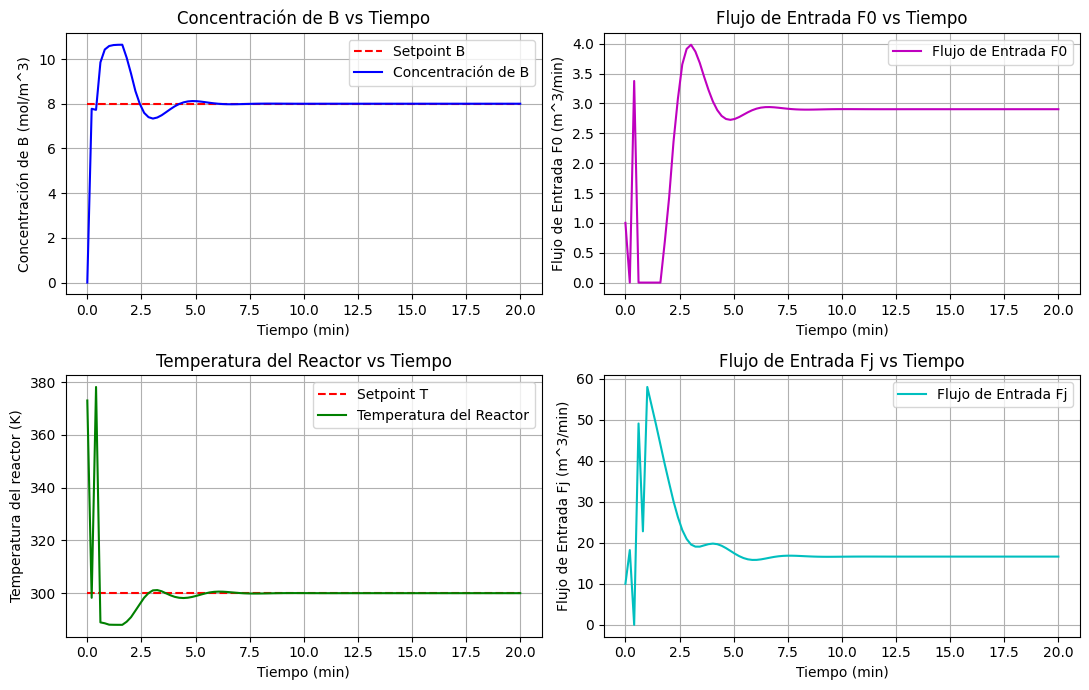

In [7]:
# Graficar resultados
plt.figure(figsize=(11, 7))

# Gráfico de la concentración de B
plt.subplot(2, 2, 1)
plt.grid()
plt.plot(t, Set_B, 'r--', label='Setpoint B')
plt.plot(t, CB_sol, 'b-', label='Concentración de B')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración de B (mol/m^3)')
plt.title('Concentración de B vs Tiempo')
plt.legend()

# Gráfico de la temperatura del reactor
plt.subplot(2, 2, 3)
plt.grid()
plt.plot(t, Set_T, 'r--', label='Setpoint T')
plt.plot(t, T_sol, 'g-', label='Temperatura del Reactor')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura del reactor (K)')
plt.title('Temperatura del Reactor vs Tiempo')
plt.legend()

# Gráfico del flujo de entrada F0
plt.subplot(2, 2, 2)
plt.grid()
plt.plot(t, F0_values, 'm-', label='Flujo de Entrada F0')
plt.xlabel('Tiempo (min)')
plt.ylabel('Flujo de Entrada F0 (m^3/min)')
plt.title('Flujo de Entrada F0 vs Tiempo')
plt.legend()

# Gráfico del flujo de chaqueta Fj
plt.subplot(2, 2, 4)
plt.grid()
plt.plot(t, Fj_values, 'c-', label='Flujo de Entrada Fj')
plt.xlabel('Tiempo (min)')
plt.ylabel('Flujo de Entrada Fj (m^3/min)')
plt.title('Flujo de Entrada Fj vs Tiempo')
plt.legend()

plt.tight_layout()
plt.show()


## Codigo Automatizacion

In [2]:
# Importar las librerías necesarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatText, interactive
import ipywidgets as widgets

# Parámetros fijos del sistema
CA0 = 10.64  # Concentración inicial del reactante [mol/m^3]
V = 1.36     # Volumen de la mezcla [m^3]
R = 1.17     # Constante de los gases [J/mol.K]
Vj = 0.11    # Volumen de la chaqueta [m^3]
alpha = 7.08  # Factor pre-exponencial de Arrhenius [1/min]
E = 31.65     # Energía de activación [J/mol]
U = 945.84    # Coeficiente de transferencia de calor [J/h.m^2.K]
lambda_ = -31.65 # Calor exotérmico de reacción [J/mol]
A = 23.24     # Área de transferencia de calor [m^2]
T0 = 373      # Temperatura de alimentación [K]
T0j = 288     # Temperatura de la chaqueta [K]
rho = 1.41    # Densidad de la mezcla reaccionante [kg/m^3]
Cp = 0.98     # Capacidad calórica promedio de la mezcla reaccionante [J/kg.K]
rhoj = 1.29   # Densidad del líquido dentro de la chaqueta [kg/m^3]
Cpj = 4.01    # Capacidad calórica del líquido dentro de la chaqueta [J/kg.K]

# Definición del modelo de ecuaciones diferenciales
def model(y, t, F0, Fj):
    CA, CB, T, Tj = y
    k = alpha * np.exp(-E / (R * T))
    dCA_dt = (F0 * CA0 - F0 * CA - V * k * CA) / V
    dCB_dt = (V * k * CA - F0 * CB) / V
    dT_dt = (rho * Cp * F0 * (T0 - T) - lambda_ * k * V * CA - U * A * (T - Tj)) / (rho * Cp * V)
    dTj_dt = (rhoj * Cpj * Fj * (T0j - Tj) + U * A * (T - Tj)) / (rhoj * Cpj * Vj)
    return [dCA_dt, dCB_dt, dT_dt, dTj_dt]

# Definición de la clase del controlador PID
class PID:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.prev_error = 0
        self.integral = 0

    def compute(self, current_value, dt):
        error = self.setpoint - current_value
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

# Función para actualizar la simulación interactivamente
def simulate(setpoint_B, Kp_B, Ki_B, Kd_B, setpoint_T, Kp_T, Ki_T, Kd_T):
    # Configuración del PID para la concentración de B
    pid_B = PID(Kp_B, Ki_B, Kd_B, setpoint_B)
    
    # Configuración del PID para la temperatura del reactor
    pid_T = PID(Kp_T, Ki_T, Kd_T, setpoint_T)
    
    # Simulación del proceso con control PID
    CA_initial = CA0
    CB_initial = 0.0
    T_initial = T0
    Tj_initial = T0j
    y0 = [CA_initial, CB_initial, T_initial, Tj_initial]
    t = np.linspace(0, 20, 100)
    dt = t[1] - t[0]
    F0 = 1  # Inicialización de F0
    Fj = 10  # Inicialización de Fj
    F0_values = []
    Fj_values = []
    CA_sol = []
    CB_sol = []
    T_sol = []
    Tj_sol = []

    y = y0
    for i in range(len(t)):
        CA_sol.append(y[0])
        CB_sol.append(y[1])
        T_sol.append(y[2])
        Tj_sol.append(y[3])
        F0_values.append(F0)
        Fj_values.append(Fj)
        y0 = [CA_sol[i], CB_sol[i], T_sol[i], Tj_sol[i]]

        # Control PID para concentración de B
        F0 = pid_B.compute(y[1], dt)
        F0 = max(F0, 0)  # Asegurar que F0 no sea negativo

        # Control PID para temperatura del reactor
        Fj = pid_T.compute(y[2], dt)
        Fj = max(Fj, 0)  # Asegurar que Fj no sea negativo

        # Resolución de la siguiente etapa usando odeint
        y = odeint(model, y0, [t[i], t[i] + dt], args=(F0, Fj))[-1]

    # Graficar resultados
    plt.figure(figsize=(11, 7))

    # Gráfico de la concentración de B
    plt.subplot(2, 2, 1)
    plt.grid()
    plt.plot(t, [setpoint_B]*len(t), 'r--', label='Setpoint B')
    plt.plot(t, CB_sol, 'b-', label='Concentración de B')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Concentración de B (mol/m^3)')
    plt.title('Concentración de B vs Tiempo')
    plt.legend()

    # Gráfico de la temperatura del reactor
    plt.subplot(2, 2, 3)
    plt.grid()
    plt.plot(t, [setpoint_T]*len(t), 'r--', label='Setpoint T')
    plt.plot(t, T_sol, 'g-', label='Temperatura del Reactor')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura del reactor (K)')
    plt.title('Temperatura del Reactor vs Tiempo')
    plt.legend()

    # Gráfico del flujo de entrada F0
    plt.subplot(2, 2, 2)
    plt.grid()
    plt.plot(t, F0_values, 'm-', label='Flujo de Entrada F0')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Flujo de Entrada F0 (m^3/min)')
    plt.title('Flujo de Entrada F0 vs Tiempo')
    plt.legend()

    # Gráfico del flujo de chaqueta Fj
    plt.subplot(2, 2, 4)
    plt.grid()
    plt.plot(t, Fj_values, 'c-', label='Flujo de Entrada Fj')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Flujo de Entrada Fj (m^3/min)')
    plt.title('Flujo de Entrada Fj vs Tiempo')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Widgets para ingresar valores con el teclado
setpoint_B = FloatText(value=8, description='Setpoint B')
Kp_B = FloatText(value=0.7, description='Kp B')
Ki_B = FloatText(value=-2, description='Ki B')
Kd_B = FloatText(value=-0.17, description='Kd B')
setpoint_T = FloatText(value=300, description='Setpoint T')
Kp_T = FloatText(value=0.6, description='Kp T')
Ki_T = FloatText(value=-2, description='Ki T')
Kd_T = FloatText(value=-0.09, description='Kd T')

# Interfaz interactiva
ui = widgets.VBox([setpoint_B, Kp_B, Ki_B, Kd_B, setpoint_T, Kp_T, Ki_T, Kd_T])
out = widgets.interactive_output(
    simulate, 
    {'setpoint_B': setpoint_B, 'Kp_B': Kp_B, 'Ki_B': Ki_B, 'Kd_B': Kd_B,
     'setpoint_T': setpoint_T, 'Kp_T': Kp_T, 'Ki_T': Ki_T, 'Kd_T': Kd_T}
)

# Mostrar los controles y los resultados
display(ui, out)

Output()

## Referencias

1. **Modelización de Fallas en Reactor Químico con Agitación (CSTR)**. Este artículo sirvió como base para obtener los datos de parámetros y constantes del reactor, garantizando que la simulación refleje un comportamiento realista y ajustado a las condiciones típicas de operación de un CSTR.